# Importing Libraries

In [1]:

import math
import matplotlib.pyplot as plt
from sklearn import datasets
from random import randint
import random
import numpy as np

iris = datasets.load_iris()
irisData=np.copy(iris.data)
irisTarget=np.copy(iris.target)


# Set Value of K and Number of TrainingData

In [2]:
K=5                             # Value of K
ntraining=100                   # Number of training data

# Functions
Function to Plot Graph

In [3]:
def showgraph(irisData,irisTarget,indS,indE):
    X = irisData[:, :2]  
    y = irisTarget
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    plt.figure(2, figsize=(8, 6))
    plt.clf()

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show

Function to Calculate Distance between 2 points

In [4]:
def calculateDistance(pt1,pt2):
    return pow(sum(pow((pt1-pt2),2)),0.5)

Function that return indexes of K Nearest Neighbours

In [5]:
def knn_ind(trainingData,testPt,k):

    distArr=[[]]
    i=0
    for trainPt in trainingData:
        distArr.append([calculateDistance(trainPt,testPt),i])
        i+=1
    distArr.sort()    
    j=1
    nbr_ind=[]
    while (j<=k):
        nbr_ind.append(distArr[j][1])
        j+=1
    return nbr_ind

Funtion to Predict Label using KNN

In [6]:
def predict_label(trainingData,trainingTarget,testPt,k):
    nbr_ind=knn_ind(trainingData,testPt,k)
    
    
    counts=np.bincount(trainingTarget[nbr_ind])
   
    predicted= np.argmax(counts)
    return predicted

# Printing Iris Data

In [7]:

print iris.feature_names
j=0
for i in iris.data:
    print "Features-> " ,i,' , Specie-> ',iris.target_names[iris.target[j]]
    j+=1



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Features->  [5.1 3.5 1.4 0.2]  , Specie->  setosa
Features->  [4.9 3.  1.4 0.2]  , Specie->  setosa
Features->  [4.7 3.2 1.3 0.2]  , Specie->  setosa
Features->  [4.6 3.1 1.5 0.2]  , Specie->  setosa
Features->  [5.  3.6 1.4 0.2]  , Specie->  setosa
Features->  [5.4 3.9 1.7 0.4]  , Specie->  setosa
Features->  [4.6 3.4 1.4 0.3]  , Specie->  setosa
Features->  [5.  3.4 1.5 0.2]  , Specie->  setosa
Features->  [4.4 2.9 1.4 0.2]  , Specie->  setosa
Features->  [4.9 3.1 1.5 0.1]  , Specie->  setosa
Features->  [5.4 3.7 1.5 0.2]  , Specie->  setosa
Features->  [4.8 3.4 1.6 0.2]  , Specie->  setosa
Features->  [4.8 3.  1.4 0.1]  , Specie->  setosa
Features->  [4.3 3.  1.1 0.1]  , Specie->  setosa
Features->  [5.8 4.  1.2 0.2]  , Specie->  setosa
Features->  [5.7 4.4 1.5 0.4]  , Specie->  setosa
Features->  [5.4 3.9 1.3 0.4]  , Specie->  setosa
Features->  [5.1 3.5 1.4 0.3]  , Specie->  setosa
Features->  [5.7 

# Shuffling Iris Data

In [8]:


for i in range(len(irisData)):
    
    temp=np.copy(irisData[i])
    temp2=np.copy(irisTarget[i])
    ind=randint(i,len(irisData)-1)
    irisData[i]=irisData[ind]
    irisTarget[i]=irisTarget[ind]
    irisData[ind]=temp
    irisTarget[ind]=temp2




# Iris Graph plotted against Sepal length and Sepal width
The graph is plotted just for demonstration of dataset. KNN is applied on all the features of Iris Dataset

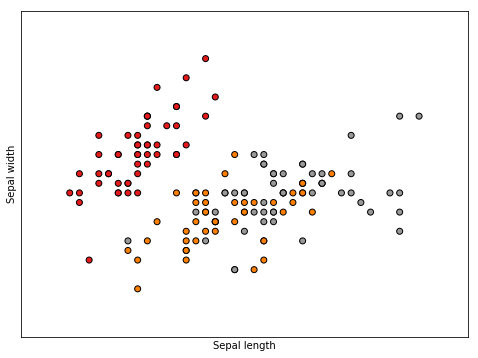

In [9]:
showgraph(irisData,irisTarget,0,150)

# Separating Training and Test Samples

In [10]:
n=ntraining
trainingData=irisData[:n,]
trainingTarget=irisTarget[:n,]
testingData=irisData[n:len(irisData),]
testingTarget=irisTarget[n:len(irisData),]
print "Training Data:\n",trainingData
print "\n\nTesting Data:\n",testingData




Training Data:
[[6.1 2.8 4.  1.3]
 [4.4 3.  1.3 0.2]
 [4.8 3.4 1.9 0.2]
 [6.3 2.3 4.4 1.3]
 [6.3 2.5 5.  1.9]
 [7.2 3.6 6.1 2.5]
 [6.  2.7 5.1 1.6]
 [5.  3.5 1.3 0.3]
 [6.2 2.2 4.5 1.5]
 [6.7 3.  5.2 2.3]
 [5.  3.6 1.4 0.2]
 [5.  3.  1.6 0.2]
 [5.5 4.2 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [6.4 3.2 4.5 1.5]
 [6.8 3.  5.5 2.1]
 [5.6 2.9 3.6 1.3]
 [5.7 2.9 4.2 1.3]
 [6.7 3.3 5.7 2.5]
 [5.4 3.4 1.7 0.2]
 [5.8 2.7 5.1 1.9]
 [5.5 2.5 4.  1.3]
 [6.  2.2 4.  1. ]
 [5.4 3.4 1.5 0.4]
 [5.  2.3 3.3 1. ]
 [5.7 3.8 1.7 0.3]
 [5.8 2.6 4.  1.2]
 [6.9 3.1 5.1 2.3]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [5.6 2.7 4.2 1.3]
 [4.6 3.6 1.  0.2]
 [7.7 2.6 6.9 2.3]
 [5.6 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [6.4 3.2 5.3 2.3]
 [7.  3.2 4.7 1.4]
 [6.4 2.8 5.6 2.1]
 [6.8 2.8 4.8 1.4]
 [7.2 3.  5.8 1.6]
 [5.1 3.8 1.9 0.4]
 [5.1 2.5 3.  1.1]
 [5.5 2.6 4.4 1.2]
 [6.7 3.1 4.4 1.4]
 [6.5 3.  5.2 2. ]
 [4.8 3.  1.4 0.3]
 [6.4 2.8 5.6 2.2]
 [5.  2.  3.5 1. ]
 [5.4 3.9 1.3 0.4]
 [6.  2.9 4.5 1.5]
 [5.2 3.4 1.4 0.2]
 [5.8 4.  1.2 0.

# Training Data plot

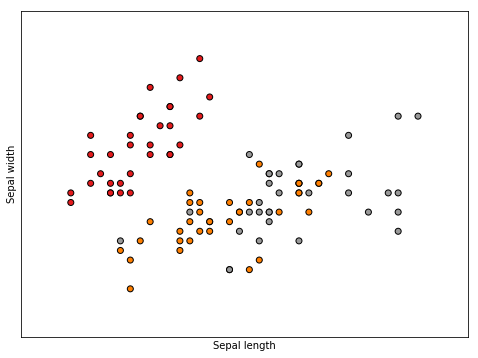

In [11]:
showgraph(trainingData,trainingTarget,0,n)

# Testing Data plot

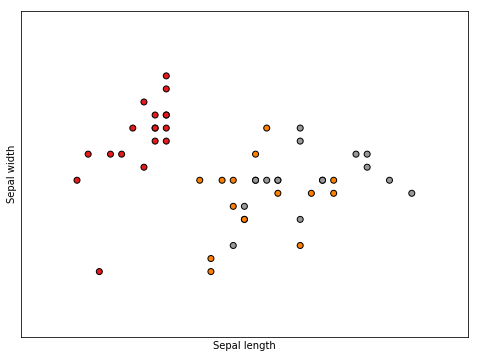

In [12]:
showgraph(testingData,testingTarget,n,len(irisData))

# Running KNN when K=5
# Main1

In [13]:
def Run_KNN_main(trainingData,testingData,trainingTarget,testingTarget):
    i=0
    countCorrectPredictions=0
    print "Testing Data                            Predicted                     Actual\n"
    for testPt in testingData:

        predicted=predict_label(trainingData,trainingTarget,testPt,5)
        actual=testingTarget[i]
        if predicted==actual:
            countCorrectPredictions+=1
        print "TestSample-> ",testPt,"       ",iris.target_names[predicted],"                   ",iris.target_names[actual]
        i+=1
    accuracy=float((float(countCorrectPredictions)/len(testingTarget)))*100
    print "\n\nCorrect Predictions:",countCorrectPredictions,"/",len(testingTarget)
    print "Accuracy Percentage:",accuracy

In [14]:
Run_KNN_main(trainingData,testingData,trainingTarget,testingTarget)

Testing Data                            Predicted                     Actual

TestSample->  [6.3 2.5 4.9 1.5]         virginica                     versicolor
TestSample->  [5.1 3.3 1.7 0.5]         setosa                     setosa
TestSample->  [5.7 3.  4.2 1.2]         versicolor                     versicolor
TestSample->  [5.1 3.5 1.4 0.3]         setosa                     setosa
TestSample->  [4.8 3.4 1.6 0.2]         setosa                     setosa
TestSample->  [4.9 3.6 1.4 0.1]         setosa                     setosa
TestSample->  [6.1 3.  4.6 1.4]         versicolor                     versicolor
TestSample->  [5.8 2.7 5.1 1.9]         virginica                     virginica
TestSample->  [5.1 3.4 1.5 0.2]         setosa                     setosa
TestSample->  [5.8 2.8 5.1 2.4]         virginica                     virginica
TestSample->  [6.1 3.  4.9 1.8]         virginica                     virginica
TestSample->  [5.6 3.  4.1 1.3]         versicolor                 

# Plotting Accuracy for Different Values of K (i.e K(1,10))

In [15]:
def plot_accuracy_graph(trainingData,testingData,trainingTarget,testingTarget): 
    objects = ('K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6','K=7','K=8','K-9','K=10')
    y_pos = np.arange(len(objects))
    performance = np.array([96,98,96,94,92,91,98.5,99,92,94])

    for perf in range(10):
        countCorrectPredictions=0
        i=0
        for testPt in testingData:

            predicted=predict_label(trainingData,trainingTarget,testPt,perf+1)
            actual=testingTarget[i]
            if predicted==actual:
                countCorrectPredictions+=1
            i+=1
        accuracy=float((float(countCorrectPredictions)/len(testingTarget)))*100
        performance[perf]=accuracy

    y_min, y_max = performance.min() - 5, 100
    plt.bar(y_pos, performance, align='center', alpha=0.4)
    plt.ylim(y_min, y_max)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy %')
    plt.title('Accuracy of testing data for different values of K')

    plt.show()

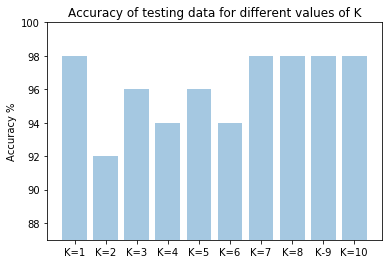

In [16]:
plot_accuracy_graph(trainingData,testingData,trainingTarget,testingTarget)


# Normalization: 

# Normalizing Iris Data

In [17]:
normalizedData=np.copy(irisData)
for i in range(len(irisData[0,:])):
    normalizedData[:,i]=(irisData[:,i]-np.min(irisData[:,i])) / (np.max(irisData[:,i])-np.min(irisData[:,i]))
print "Normalized Data: \n",normalizedData


Normalized Data: 
[[0.5        0.33333333 0.50847458 0.5       ]
 [0.02777778 0.41666667 0.05084746 0.04166667]
 [0.13888889 0.58333333 0.15254237 0.04166667]
 [0.55555556 0.125      0.57627119 0.5       ]
 [0.55555556 0.20833333 0.6779661  0.75      ]
 [0.80555556 0.66666667 0.86440678 1.        ]
 [0.47222222 0.29166667 0.69491525 0.625     ]
 [0.19444444 0.625      0.05084746 0.08333333]
 [0.52777778 0.08333333 0.59322034 0.58333333]
 [0.66666667 0.41666667 0.71186441 0.91666667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.19444444 0.41666667 0.10169492 0.04166667]
 [0.33333333 0.91666667 0.06779661 0.04166667]
 [0.55555556 0.33333333 0.69491525 0.58333333]
 [0.58333333 0.5        0.59322034 0.58333333]
 [0.69444444 0.41666667 0.76271186 0.83333333]
 [0.36111111 0.375      0.44067797 0.5       ]
 [0.38888889 0.375      0.54237288 0.5       ]
 [0.66666667 0.54166667 0.79661017 1.        ]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.41666667 0.29166667 0.69491525 0.75   

# Graph of Normalized Data against Sepal Length and Sepal Width

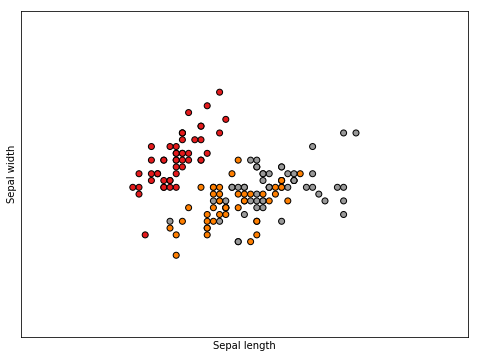

In [18]:
showgraph(normalizedData,irisTarget,n,len(irisData))

# Separating Testing and Training Samples

In [19]:
n=ntraining
trainingData=normalizedData[:n,]
trainingTarget=irisTarget[:n,]
testingData=normalizedData[n:len(irisData),]
testingTarget=irisTarget[n:len(irisData),]
print "Normalized Training Data:\n",trainingData
print "\n\nNormalized Testing Data:\n",testingData

Normalized Training Data:
[[0.5        0.33333333 0.50847458 0.5       ]
 [0.02777778 0.41666667 0.05084746 0.04166667]
 [0.13888889 0.58333333 0.15254237 0.04166667]
 [0.55555556 0.125      0.57627119 0.5       ]
 [0.55555556 0.20833333 0.6779661  0.75      ]
 [0.80555556 0.66666667 0.86440678 1.        ]
 [0.47222222 0.29166667 0.69491525 0.625     ]
 [0.19444444 0.625      0.05084746 0.08333333]
 [0.52777778 0.08333333 0.59322034 0.58333333]
 [0.66666667 0.41666667 0.71186441 0.91666667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.19444444 0.41666667 0.10169492 0.04166667]
 [0.33333333 0.91666667 0.06779661 0.04166667]
 [0.55555556 0.33333333 0.69491525 0.58333333]
 [0.58333333 0.5        0.59322034 0.58333333]
 [0.69444444 0.41666667 0.76271186 0.83333333]
 [0.36111111 0.375      0.44067797 0.5       ]
 [0.38888889 0.375      0.54237288 0.5       ]
 [0.66666667 0.54166667 0.79661017 1.        ]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.41666667 0.29166667 0.69491525

# Running KNN for K=5 on Normalized Data

In [20]:
Run_KNN_main(trainingData,testingData,trainingTarget,testingTarget)

Testing Data                            Predicted                     Actual

TestSample->  [0.55555556 0.20833333 0.66101695 0.58333333]         versicolor                     versicolor
TestSample->  [0.22222222 0.54166667 0.11864407 0.16666667]         setosa                     setosa
TestSample->  [0.38888889 0.41666667 0.54237288 0.45833333]         versicolor                     versicolor
TestSample->  [0.22222222 0.625      0.06779661 0.08333333]         setosa                     setosa
TestSample->  [0.13888889 0.58333333 0.10169492 0.04166667]         setosa                     setosa
TestSample->  [0.16666667 0.66666667 0.06779661 0.        ]         setosa                     setosa
TestSample->  [0.5        0.41666667 0.61016949 0.54166667]         versicolor                     versicolor
TestSample->  [0.41666667 0.29166667 0.69491525 0.75      ]         virginica                     virginica
TestSample->  [0.22222222 0.58333333 0.08474576 0.04166667]         setosa  

# Accuracy Plot when Data is Normalized

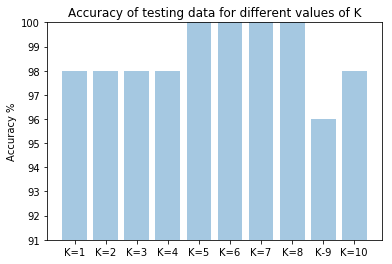

In [21]:
plot_accuracy_graph(trainingData,testingData,trainingTarget,testingTarget)


So accuracy is increased when data is normalized

# Standardization:

# Standardizing Iris Data

In [22]:
standardizedData=np.copy(irisData)
for i in range(len(irisData[0,:])):
    standardizedData[:,i]=(irisData[:,i]-np.mean(irisData[:,i])) / (np.nanstd(irisData[:,i]))
print "Standardized Data: \n",standardizedData

Standardized Data: 
[[ 3.10997534e-01 -5.92373012e-01  1.37546573e-01  1.32509732e-01]
 [-1.74885626e+00 -1.31979479e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.05603939e+00 -1.31544430e+00]
 [ 5.53333275e-01 -1.74335684e+00  3.64896281e-01  1.32509732e-01]
 [ 5.53333275e-01 -1.28296331e+00  7.05920842e-01  9.22302838e-01]
 [ 1.64384411e+00  1.24920112e+00  1.33113254e+00  1.71209594e+00]
 [ 1.89829664e-01 -8.22569778e-01  7.62758269e-01  5.27406285e-01]
 [-1.02184904e+00  1.01900435e+00 -1.39706395e+00 -1.18381211e+00]
 [ 4.32165405e-01 -1.97355361e+00  4.21733708e-01  3.95774101e-01]
 [ 1.03800476e+00 -1.31979479e-01  8.19595696e-01  1.44883158e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.02184904e+00 -1.31979479e-01 -1.22655167e+00 -1.31544430e+00]
 [-4.16009689e-01  2.63038172e+00 -1.34022653e+00 -1.31544430e+00]
 [ 5.53333275e-01 -5.92373012e-01  7.62758269e-01  3.95774101e-01]
 [ 6.74501145e-01  3.28414053e-01  4.21733

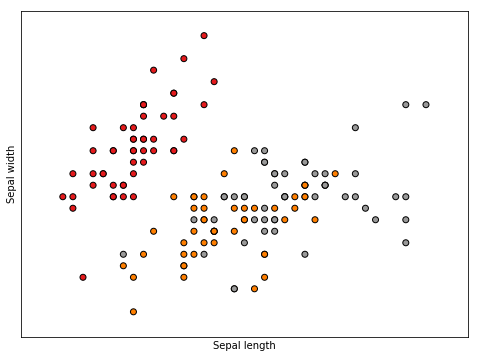

In [23]:
showgraph(standardizedData,irisTarget,n,len(irisData))

# Separating Testing and Training Samples

In [24]:
n=ntraining
trainingData=standardizedData[:n,]
trainingTarget=irisTarget[:n,]
testingData=standardizedData[n:len(irisData),]
testingTarget=irisTarget[n:len(irisData),]
print "Normalized Training Data:\n",trainingData
print "\n\nNormalized Testing Data:\n",testingData

Normalized Training Data:
[[ 3.10997534e-01 -5.92373012e-01  1.37546573e-01  1.32509732e-01]
 [-1.74885626e+00 -1.31979479e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.05603939e+00 -1.31544430e+00]
 [ 5.53333275e-01 -1.74335684e+00  3.64896281e-01  1.32509732e-01]
 [ 5.53333275e-01 -1.28296331e+00  7.05920842e-01  9.22302838e-01]
 [ 1.64384411e+00  1.24920112e+00  1.33113254e+00  1.71209594e+00]
 [ 1.89829664e-01 -8.22569778e-01  7.62758269e-01  5.27406285e-01]
 [-1.02184904e+00  1.01900435e+00 -1.39706395e+00 -1.18381211e+00]
 [ 4.32165405e-01 -1.97355361e+00  4.21733708e-01  3.95774101e-01]
 [ 1.03800476e+00 -1.31979479e-01  8.19595696e-01  1.44883158e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.02184904e+00 -1.31979479e-01 -1.22655167e+00 -1.31544430e+00]
 [-4.16009689e-01  2.63038172e+00 -1.34022653e+00 -1.31544430e+00]
 [ 5.53333275e-01 -5.92373012e-01  7.62758269e-01  3.95774101e-01]
 [ 6.74501145e-01  3.28414053e-01  4

# Running KNN for K=5 on Standardized Data

In [25]:
Run_KNN_main(trainingData,testingData,trainingTarget,testingTarget)

Testing Data                            Predicted                     Actual

TestSample->  [ 0.55333328 -1.28296331  0.64908342  0.3957741 ]         virginica                     versicolor
TestSample->  [-0.90068117  0.55861082 -1.16971425 -0.92054774]         setosa                     setosa
TestSample->  [-0.17367395 -0.13197948  0.25122143  0.00087755]         versicolor                     versicolor
TestSample->  [-0.90068117  1.01900435 -1.34022653 -1.18381211]         setosa                     setosa
TestSample->  [-1.26418478  0.78880759 -1.22655167 -1.3154443 ]         setosa                     setosa
TestSample->  [-1.14301691  1.24920112 -1.34022653 -1.44707648]         setosa                     setosa
TestSample->  [ 0.31099753 -0.13197948  0.47857113  0.26414192]         versicolor                     versicolor
TestSample->  [-0.05250608 -0.82256978  0.76275827  0.92230284]         virginica                     virginica
TestSample->  [-0.90068117  0.78880759 -1.283

# Accuracy Plot when Data is Standardized

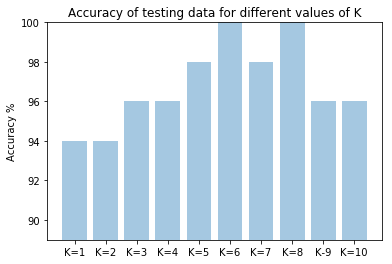

In [26]:
plot_accuracy_graph(trainingData,testingData,trainingTarget,testingTarget)


So accuracy is increased after standardizing data

# End